# 0.0 Imports

In [ ]:
import pandas as pd
import inflection
import math
import numpy as np

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

## 0.1 Helper Functions

In [113]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:50% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [104]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [ ]:
df_sales_raw = pd.read_csv('C:\\Users\\lucas\\Desktop\\Comunidade DS\\Data\\train.csv', low_memory=False)
df_store_raw = pd.read_csv('C:\\Users\\lucas\\Desktop\\Comunidade DS\\Data\\store.csv', low_memory=False)

# merge
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

# 1.0 Descrição dos Dados

In [ ]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [ ]:
cols_old = list(df_raw.columns)

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# rename
df1.columns = cols_new

In [ ]:
df1.columns

## 1.2 Data Dimensions

In [ ]:
print(f'Number os Rows {df1.shape[0]}')
print(f'Number os Rows {df1.shape[1]}')

## 1.3 Data Types

In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

## 1.4 Check NA

In [ ]:
df1.isna().sum()

## 1.5 Fillout NA

In [ ]:
# competition_distance  -→ Colocando um valor muito acima do que é a distância máxima
# df1['competition_distance'].max()
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

# competition_open_since_month  
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

# competition_open_since_year
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_month'], axis=1)

# promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['competition_open_since_month'], axis=1)


# promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['competition_open_since_month'], axis=1)
               
# promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'} 

df1['promo_interval'].fillna(0, inplace=True)

df1['month_map'] = df1['date'].dt.month.map(month_map)

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

## 1.6 Change Types

- Sempre que fizer uma transformação nas colunas do DF é legal ver os tipos dos dados

In [ ]:
df1.dtypes

In [ ]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

In [ ]:
df1.dtypes

## 1.7 Descriptive Statistical

In [ ]:
# Separando os valores númericos e descritivos

num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])

### Variaveis Numéricas

In [ ]:
num_attributes.sample(2)

### Variaveis Categoricas

In [ ]:
cat_attributes.sample(2)

### 1.7.1 Numerical Attributes

In [ ]:
# Central Tendency → Mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion → std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = (['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [ ]:
m

C:\Users\lucas\Anaconda3\envs\cds\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

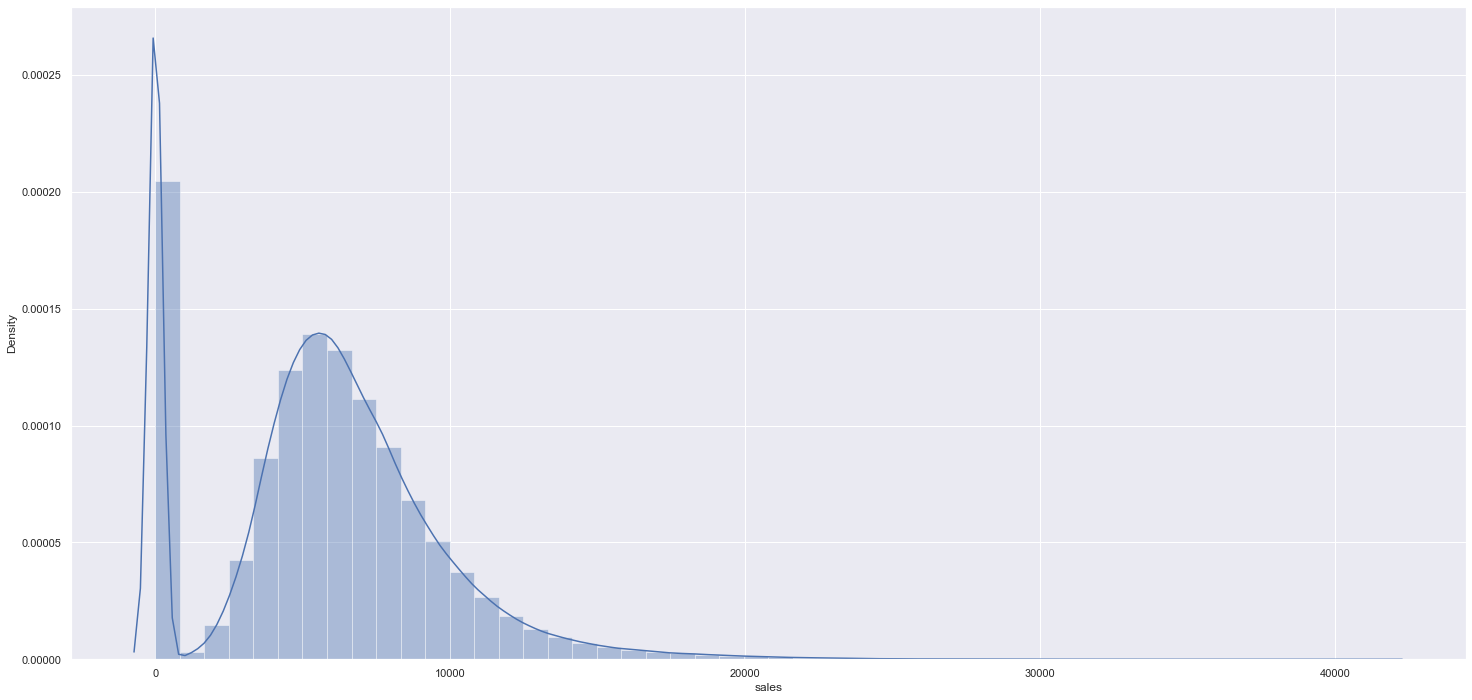

In [114]:
sns.distplot(df1['sales'])

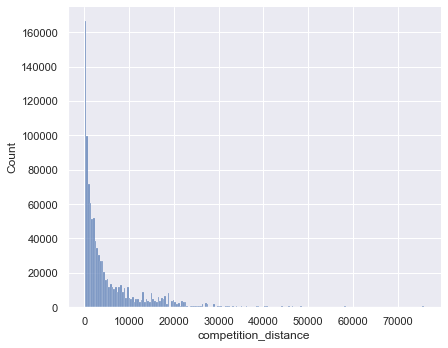

In [116]:
sns.displot(df1.loc[df1['competition_distance'] < 200000, 'competition_distance'], bins=200, height=5, aspect=15/11.75)
# sns.displot(df1['competition_distance'])

### 1.7.2 Categorical Attributes

In [ ]:
cat_attributes.apply(lambda x: x.unique().shape[0])

<AxesSubplot:xlabel='assortment', ylabel='sales'>

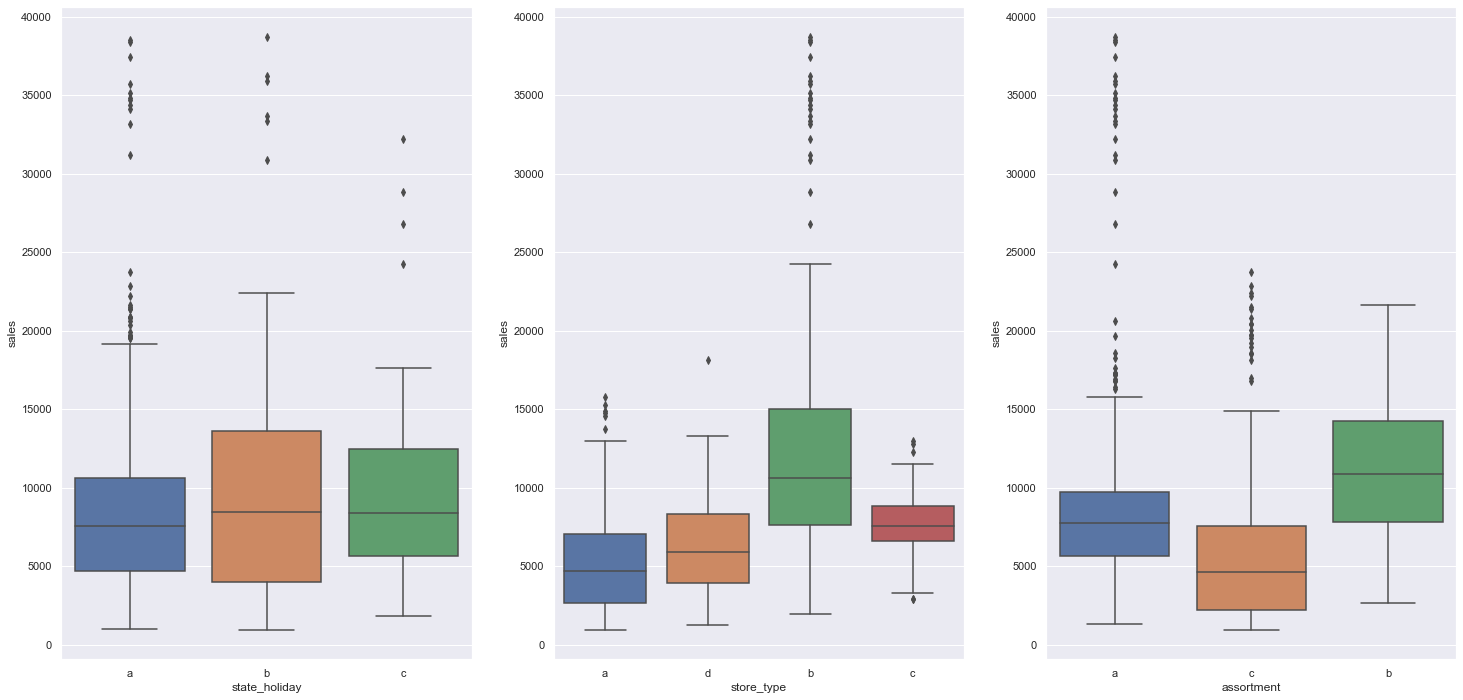

In [105]:
aux1 = df1[(df1['state_holiday'] != '0') & (df1['sales'] > 0)]

plt.subplot(1, 3, 1)
sns.boxplot(x='state_holiday' , y='sales', data=aux1)

plt.subplot(1, 3, 2)
sns.boxplot(x='store_type' , y='sales', data=aux1)

plt.subplot(1, 3, 3)
sns.boxplot(x='assortment' , y='sales', data=aux1)